In [1]:
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
from pathlib import Path
from tqdm import tqdm

In [2]:
# path to merimen data folder
merimen_path_19_02 = Path('/mmdetection/data/merimen_coco/19_02_2022/')
merimen_path_06_04 = Path('/mmdetection/data/merimen_coco/06_04_2022/')

In [3]:
scratch_merimen = json.load(open(merimen_path_19_02/'scratch'/'annotations'/'total.json'))
dent_merimen = json.load(open(merimen_path_19_02/'dent'/'annotations'/'total.json'))
# _merimen = json.load(open(merimen_path/'totaled_missing'/'annotations'/'total.json'))

In [4]:
num_imgs_scratch_merimen = len(scratch_merimen['images'])
num_annos_scratch_merimen = len(scratch_merimen['annotations'])
print('MERIMEN DATA')
print('damage : scratch')
print('number of images : ',num_imgs_scratch_merimen)
print('number of annotations : ',num_annos_scratch_merimen)
print('ratio of annotations per image : ',num_annos_scratch_merimen/num_imgs_scratch_merimen)

print('*'*20)

num_imgs_dent_merimen = len(dent_merimen['images'])
num_annos_dent_merimen = len(dent_merimen['annotations'])
print('damage : dent')
print('number of images : ',num_imgs_dent_merimen)
print('number of annotations : ',num_annos_dent_merimen)
print('ratio of annotations per image : ',num_annos_dent_merimen/num_imgs_dent_merimen)


MERIMEN DATA
damage : scratch
number of images :  90298
number of annotations :  185348
ratio of annotations per image :  2.0526257502934726
********************
damage : dent
number of images :  112268
number of annotations :  160885
ratio of annotations per image :  1.4330441443688318


In [5]:
# path to old data folder
path = Path('/mmdetection/data/')

In [6]:
scratch = json.load(open(path/'scratch'/'annotations'/'train.json'))
dent = json.load(open(path/'dent'/'annotations'/'train.json'))

In [7]:
num_imgs_scratch = len(scratch['images'])
num_annos_scratch = len(scratch['annotations'])
print('OLD DATA')
print('damage : scratch')
print('number of images : ',num_imgs_scratch)
print('number of annotations : ',num_annos_scratch)
print('ratio of annotations per image : ',num_annos_scratch/num_imgs_scratch)

print('*'*20)

num_imgs_dent = len(dent['images'])
num_annos_dent = len(dent['annotations'])
print('damage : dent')
print('number of images : ',num_imgs_dent)
print('number of annotations : ',num_annos_dent)
print('ratio of annotations per image : ',num_annos_dent/num_imgs_dent)

OLD DATA
damage : scratch
number of images :  16144
number of annotations :  81642
ratio of annotations per image :  5.05711100099108
********************
damage : dent
number of images :  10725
number of annotations :  17001
ratio of annotations per image :  1.5851748251748252


In [8]:
scratch['categories']

[{'supercategory': 'Carparts', 'id': 0, 'name': 'scratch'}]

In [9]:
clr = [(255,0,0),(0,255,0),(0,0,255),(50,100,20),(50,150,10),(100,10,100),(50,150,10),(50,150,10),(50,150,10),(50,150,10)]

def sample(js_data,img_path,img_ids=None):
    #i = random.choice(js_data['images'])
    cate_names  = [c['name'] for c in js_data['categories']] 
    num = 3
    if img_ids is None:
        imgs = random.sample(js_data['images'],num**2)
    else:
        imgs = [i for i in js_data['images'] if i['id'] in img_ids]
        
        if len(imgs) > num**2 :
            imgs = random.sample(imgs,num**2)
    #print(i['id'],i['url'])
    #num = 2 
    fig, axis = plt.subplots(num, num,figsize=(15,15))
    #print(imgs)
    for idx,i in enumerate(imgs):
        annos = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) 
                 for a in js_data['annotations'] if a['image_id'] == i['id']]
        cates = [a['category_id'] for a in js_data['annotations'] if a['image_id'] == i['id']]
        
        image = cv2.imread(str(img_path/'images'/i['file_name']))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        for anno_id,anno in enumerate(annos) : 
#             if cates[anno_id] == 0:
#                 clr = (255,0,0)
#             else:
#                 clr = (0,255,0)
#             print('debug : ',cates[anno_id])
            image = cv2.drawContours(image,[anno],-1,clr[cates[anno_id]],3)
            image = cv2.putText(image,cate_names[cates[anno_id]],anno[0],cv2.FONT_HERSHEY_SIMPLEX,1,clr[cates[anno_id]],1)
        
        axis[int(idx/num),idx%num].imshow(image)
        axis[int(idx/num),idx%num].set_title(i['id'])
        
def sample_gen(js_data,img_path,img_ids=None):
    #i = random.choice(js_data['images'])
    cate_names  = [c['name'] for c in js_data['categories']] 
    num = 3
    if img_ids is None:
        imgs = random.sample(js_data['images'],num**2)
    else:
        imgs = [i for i in js_data['images'] if i['id'] in img_ids]
        
        if len(imgs) > num**2 :
            imgs = random.sample(imgs,num**2)
    #print(i['id'],i['url'])
    #num = 2 
    fig, axis = plt.subplots(num, num,figsize=(15,15))
    #print(imgs)
    for idx,i in enumerate(imgs):
        annos = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) 
                 for a in js_data['annotations'] if a['image_id'] == i['id']]
        cates = [a['category_id'] for a in js_data['annotations'] if a['image_id'] == i['id']]
        
        print(str(img_path/'images'/i['case_id']/i['file_name']))
        image = cv2.imread(str(img_path/'images'/i['case_id']/i['file_name']))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        for anno_id,anno in enumerate(annos) : 
#             if cates[anno_id] == 0:
#                 clr = (255,0,0)
#             else:
#                 clr = (0,255,0)
#             print('debug : ',cates[anno_id])
            image = cv2.drawContours(image,[anno],-1,clr[cates[anno_id]],3)
            image = cv2.putText(image,cate_names[cates[anno_id]],anno[0],cv2.FONT_HERSHEY_SIMPLEX,1,clr[cates[anno_id]],1)
        
        axis[int(idx/num),idx%num].imshow(image)
        axis[int(idx/num),idx%num].set_title(i['id'])

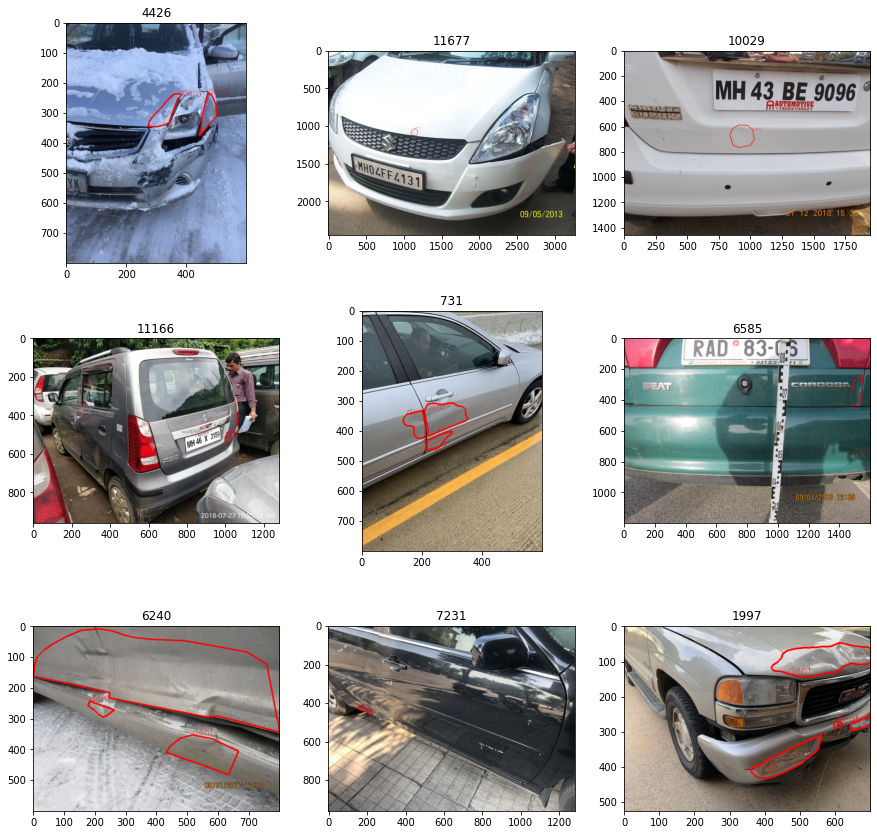

In [10]:
sample(dent,path/'dent')

In [12]:
img = [i for i in dent['images'] if i['id'] == 8981][0]
image = cv2.imread(str(path/'dent'/'images'/img['file_name']))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(image)

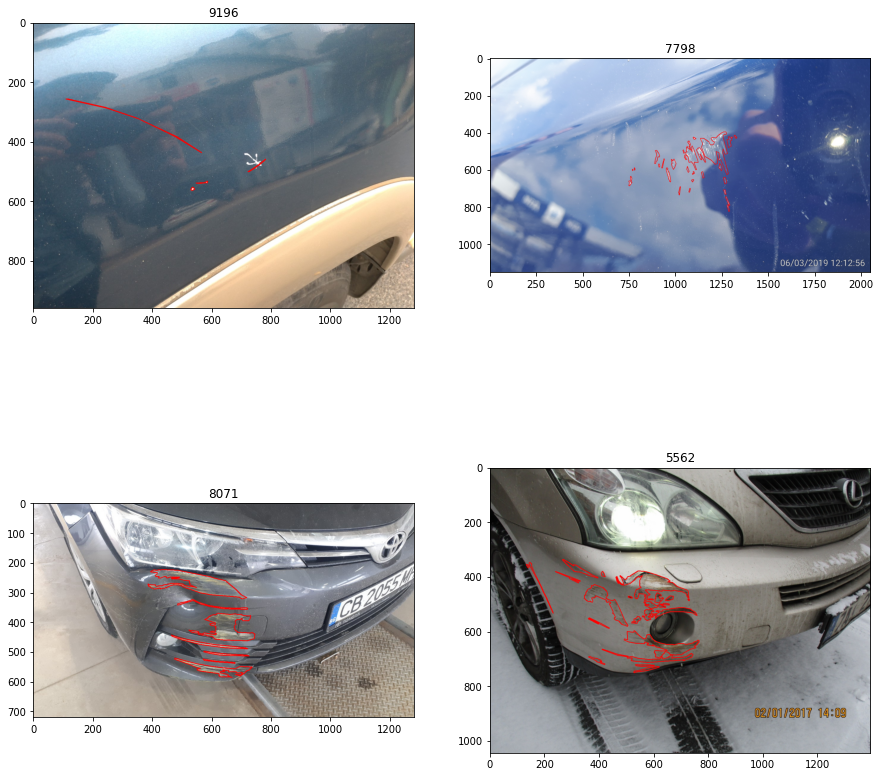

In [18]:
ids = [7798,5562,9196,8071]
sample(scratch,path/'scratch',ids)

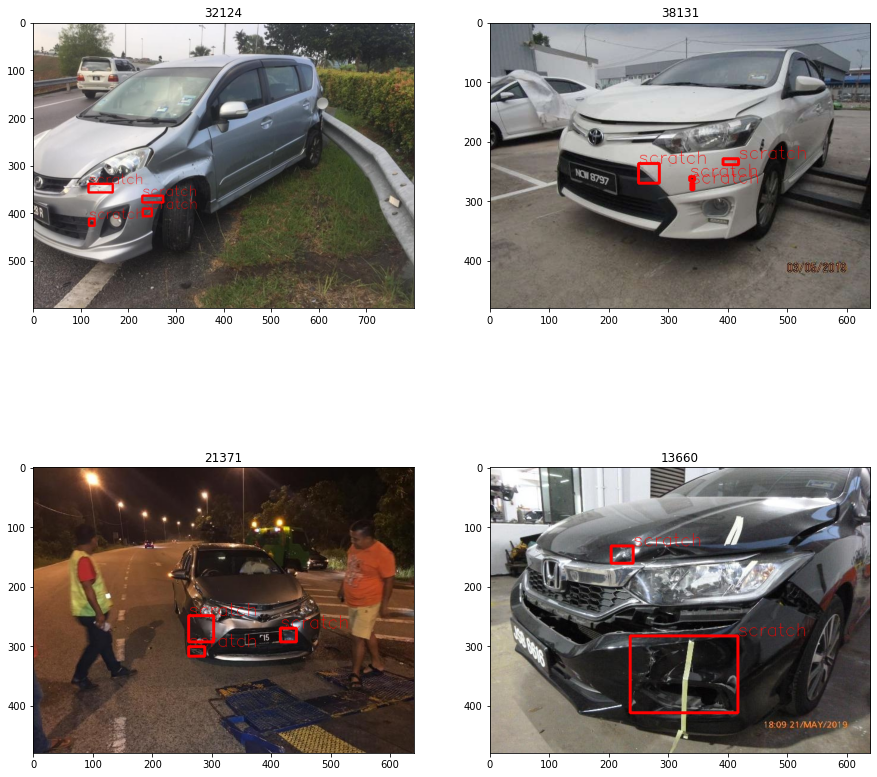

In [86]:
sample(scratch_merimen,merimen_path_19_02/'scratch')

# note case merimen
- 7724, 47588, 37710, 29742,34773,69061,59413,18608,67200,70266

In [19]:
ids = [7724, 47588, 37710, 29742,34773,69061,59413,18608,67200,70266,82994,56898]
ids = [37710,69061,56898,82994]
sample(scratch_merimen,merimen_path/'scratch',ids)

In [96]:
crack = json.load(open(path/'origin_crack'/'annotations'/'total.json'))
print(crack['categories'])

[{'supercategory': 'Carparts', 'id': 0, 'name': 'crack'}, {'supercategory': 'Carparts', 'id': 1, 'name': 'broken'}, {'supercategory': 'Carparts', 'id': 2, 'name': 'glass_broken'}, {'supercategory': 'Carparts', 'id': 3, 'name': 'lamp_broken'}, {'supercategory': 'Carparts', 'id': 4, 'name': 'hole'}]


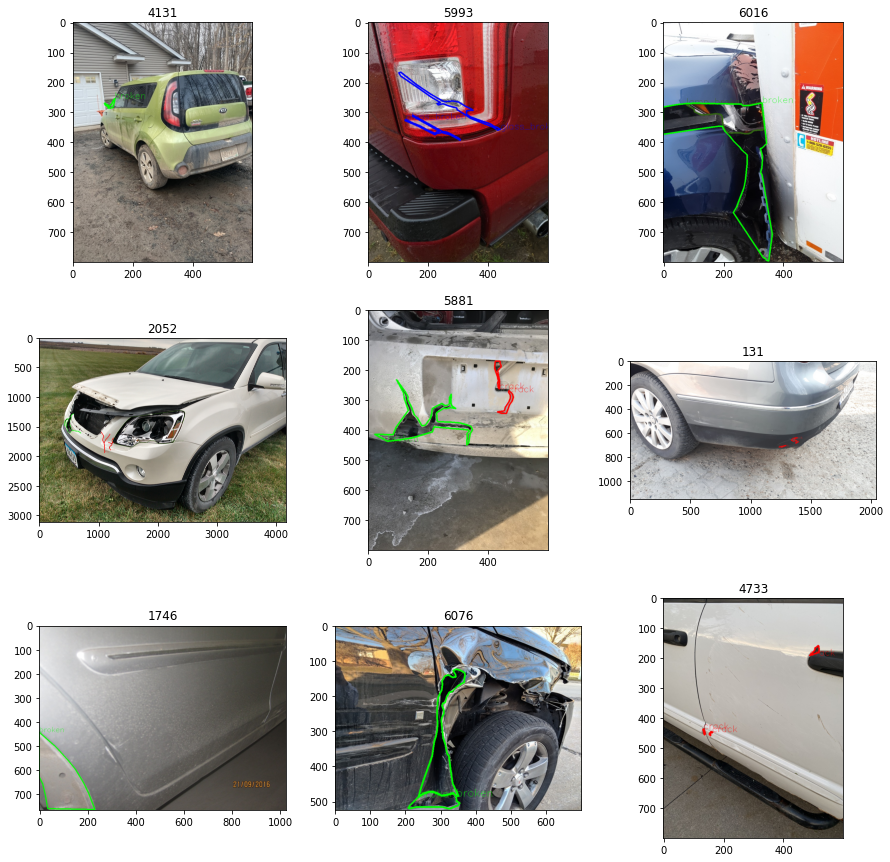

In [99]:
sample(crack,path/'origin_crack')

In [100]:
crack_merimen = json.load(open(merimen_path_06_04/'origin_crack'/'annotations'/'total.json'))

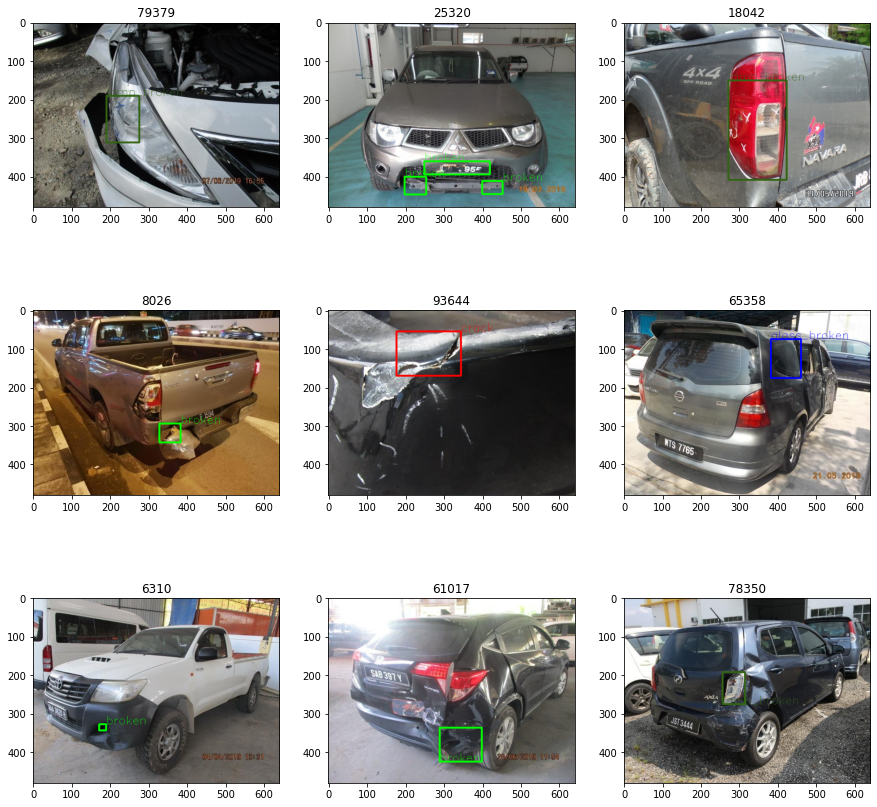

In [101]:
sample(crack_merimen,merimen_path_06_04/'origin_crack')

In [102]:
totaled_missing = json.load(open(path/'combine_missing'/'annotations'/'train.json'))

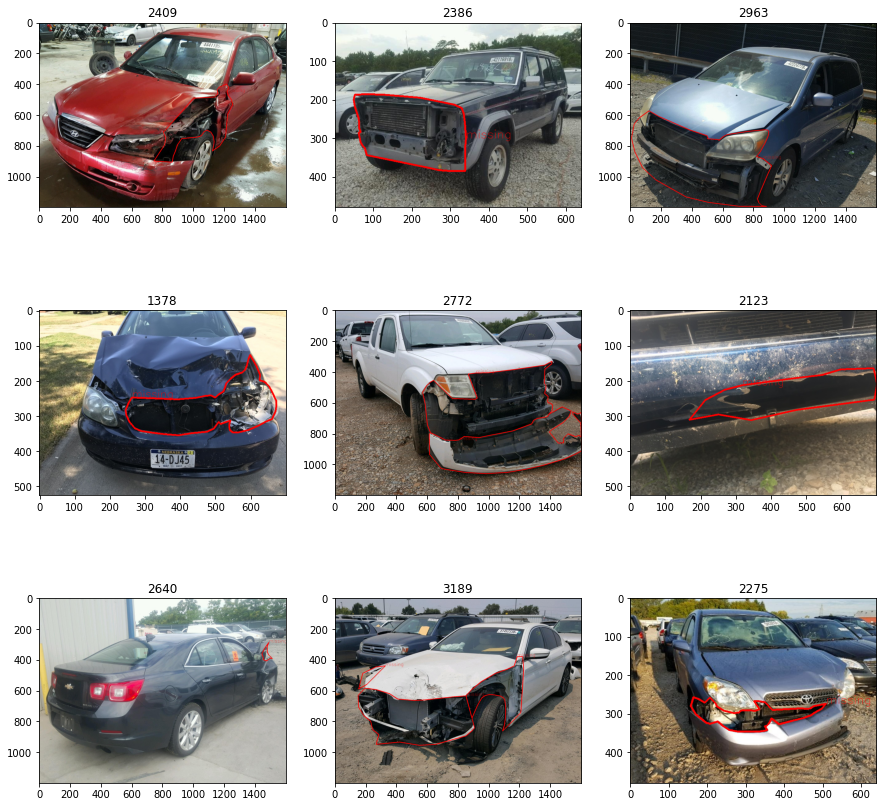

In [103]:
sample(totaled_missing,path/'combine_missing')

In [104]:
totaled_missing_merimen = json.load(open(merimen_path_06_04/'totaled_missing'/'annotations'/'total.json'))

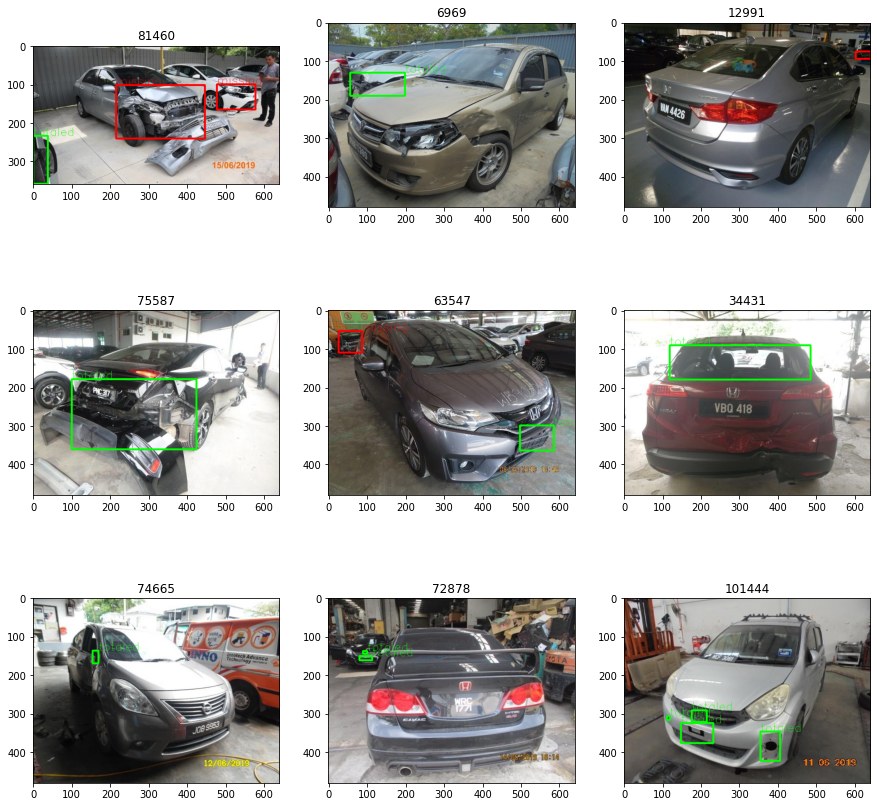

In [107]:
sample(totaled_missing_merimen,merimen_path_06_04/'totaled_missing')

In [118]:
new_path = Path('/mmdetection/data/generalide/17_05_2022')
gen = json.load(open(new_path/'annotations'/'new_test_generali_17_05_2022.json'))
print(gen['categories'])
img_ids = set([a['image_id'] for a in gen['annotations'] if a['category_id']==7])
imgs = [i for i in gen['images'] if i['id'] in img_ids]
gen['images'] = imgs

[{'supercategory': 'Carparts', 'id': 0, 'name': 'scratch'}, {'supercategory': 'Carparts', 'id': 1, 'name': 'dent'}, {'supercategory': 'Carparts', 'id': 2, 'name': 'crack'}, {'supercategory': 'Carparts', 'id': 3, 'name': 'broken'}, {'supercategory': 'Carparts', 'id': 4, 'name': 'lamp_broken'}, {'supercategory': 'Carparts', 'id': 5, 'name': 'glass_broken'}, {'supercategory': 'Carparts', 'id': 6, 'name': 'hole'}, {'supercategory': 'Carparts', 'id': 7, 'name': 'totaled'}]


/mmdetection/data/generalide/17_05_2022/images/35995821/front_right_view_7.jpeg
/mmdetection/data/generalide/17_05_2022/images/10510821/other_side_0.jpeg
/mmdetection/data/generalide/17_05_2022/images/030448421/front_side_left_head_light_10.jpeg
/mmdetection/data/generalide/17_05_2022/images/19090422/front_left_view_2.jpeg
/mmdetection/data/generalide/17_05_2022/images/022144321/left_side_fender_0.jpeg
/mmdetection/data/generalide/17_05_2022/images/14736621/left_side_fender_3.jpeg
/mmdetection/data/generalide/17_05_2022/images/024634022/rear_left_view_24.jpeg
/mmdetection/data/generalide/17_05_2022/images/79091321/rear_side_right_tail_light_1.jpeg
/mmdetection/data/generalide/17_05_2022/images/43021921/other_side_22.jpeg


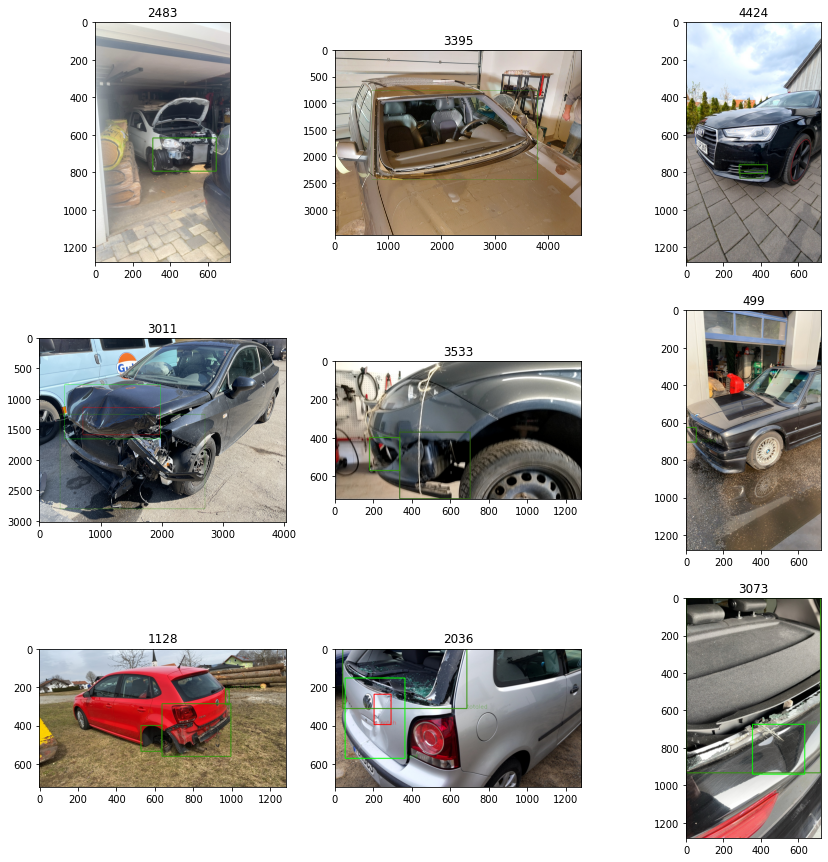

In [119]:
sample_gen(gen,new_path)